In [130]:
import numpy as np
import random
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import kernel as kernel_collection
import plot
import test_data

In [131]:
np.random.seed(100)
random.seed(100)

# Get P matrix
def get_P(N, targets, inputs, kernel):
    P = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            P[i, j] = targets[i]*targets[j]*kernel(inputs[i, :], inputs[j, :])
    return P

# Define helper functions
def zerofun(a):
    return np.dot(a, targets)


def get_non_zeros(a):
    results = []
    for i, val in enumerate(a):
        if val > 1e-5:
            results.append({
                'a': val,
                'x': inputs[i, :],
                't': targets[i]
            })
    return results


def compute_bias(a):
    non_zeros = get_non_zeros(a)

    support_vector = non_zeros[0]['x']

    sum = 0

    for i in range(N):
        sum += a[i]*targets[i]*kernel(support_vector, inputs[i, :])

    return sum - non_zeros[0]['t']


def indicator(a, s):
    sum = 0
    for i in range(N):
        sum += a[i]*targets[i]*kernel(s, inputs[i, :])
    return sum - compute_bias(a)


def master(classA, classB, inputs, targets, N, kernel, C):
    P = get_P(N, targets, inputs, kernel)
    bounds = [(0, C) for b in range(N)]

    def objective(a):
        return 0.5 * np.dot(np.transpose(a), np.dot(P, a)) - np.sum(a)
    
    results = minimize(objective, np.random.randn(N), bounds=bounds,
                   constraints={'type': 'eq', 'fun': zerofun})

    success = results['success']
    alphas = results['x']

    plot.plot(alphas, indicator, classA, classB)

    print(f"Optimization success: {success}")


# Question 1

(50, 50)


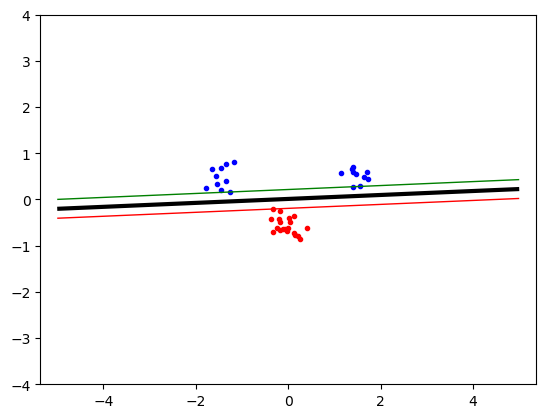

Optimization success: True
(50, 50)


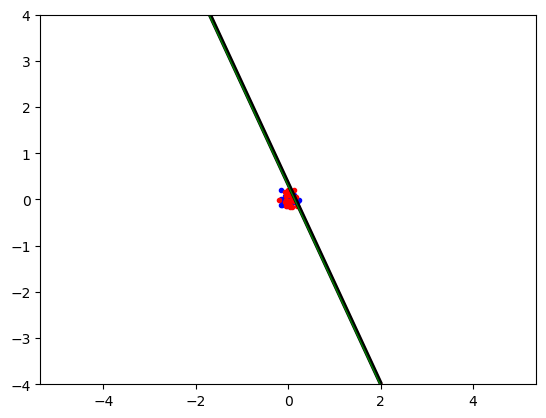

Optimization success: False
(50, 50)


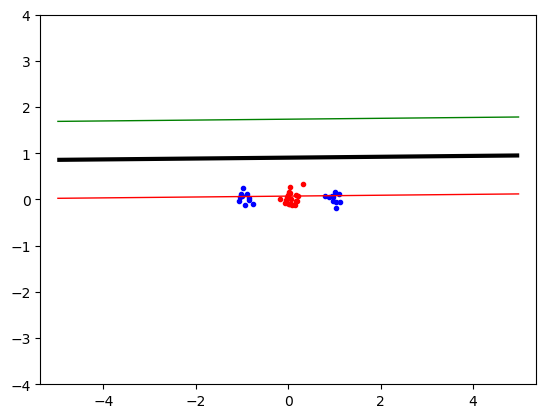

Optimization success: True
(50, 50)


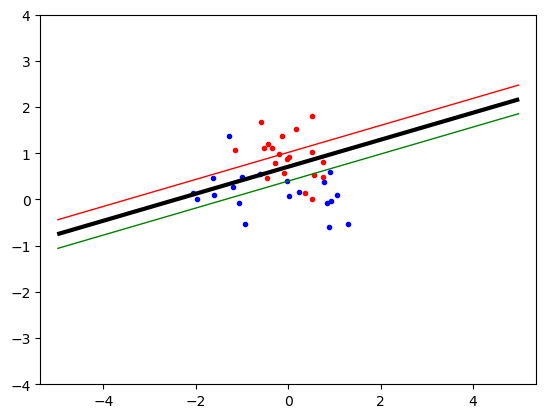

Optimization success: False


In [132]:
points = [
    [[1.5, 0.5], [-1.5, 0.5], [0, -0.5], 0.2], 
    [[0, 0], [0, 0], [0, 0], 0.1], 
    [[-1, 0], [1, 0], [0, 0], 0.1], 
    [[-1, 0], [1, 0], [0, 1], 0.5]
    ]

N = 40
C = 10e6
kernel = kernel_collection.linear

#fig, axes = plt.subplots(2, 2)

for point in points:
    inputs, targets, classA, classB = test_data.generate(N, point[0], point[1], point[2], point[3])
    master(classA, classB, inputs, targets, N, kernel, C)

# Question 2

Polynomial

(50, 50)


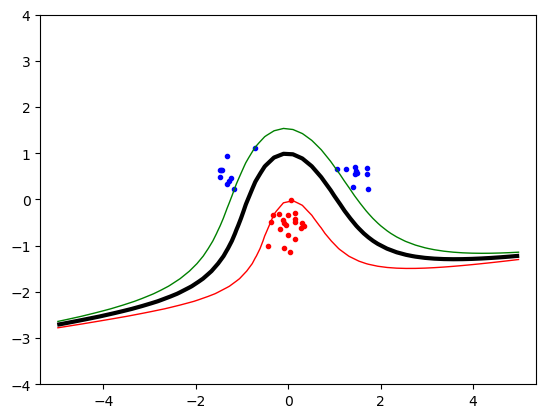

Optimization success: True
(50, 50)


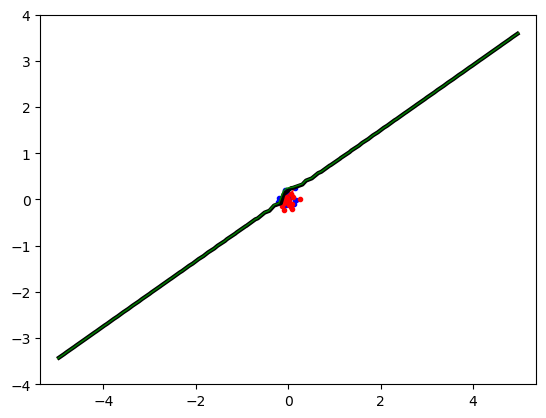

Optimization success: False
(50, 50)


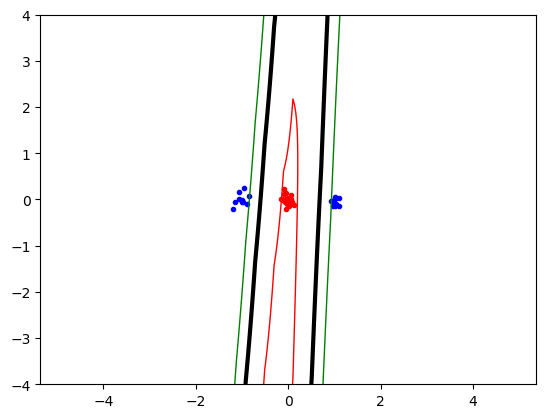

Optimization success: True
(50, 50)


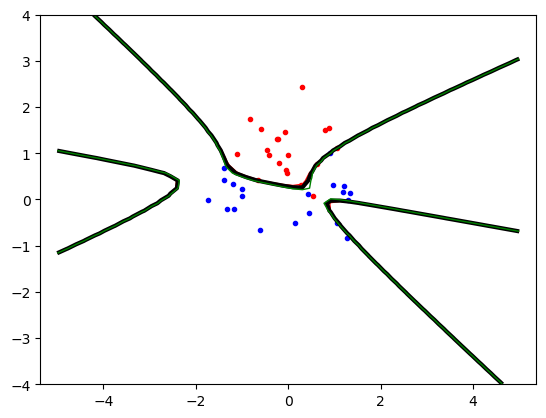

Optimization success: True


In [133]:
points = [
    [[1.5, 0.5], [-1.5, 0.5], [0, -0.5], 0.2], 
    [[0, 0], [0, 0], [0, 0], 0.1], 
    [[-1, 0], [1, 0], [0, 0], 0.1], 
    [[-1, 0], [1, 0], [0, 1], 0.5]
    ]

N = 40
C = 10e6
p = 3
kernel = kernel_collection.polynomial(p)

#fig, axes = plt.subplots(2, 2)

for point in points:
    inputs, targets, classA, classB = test_data.generate(N, point[0], point[1], point[2], point[3])
    master(classA, classB, inputs, targets, N, kernel, C)

Radial

(50, 50)


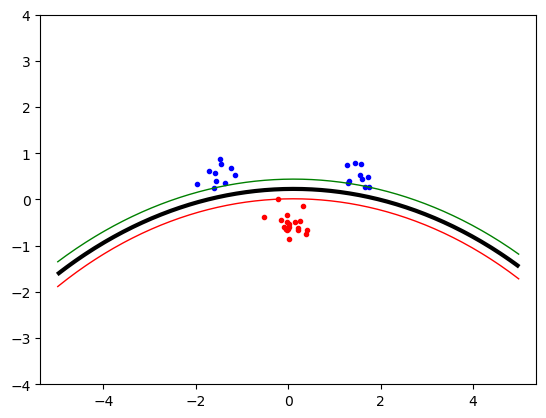

Optimization success: True
(50, 50)


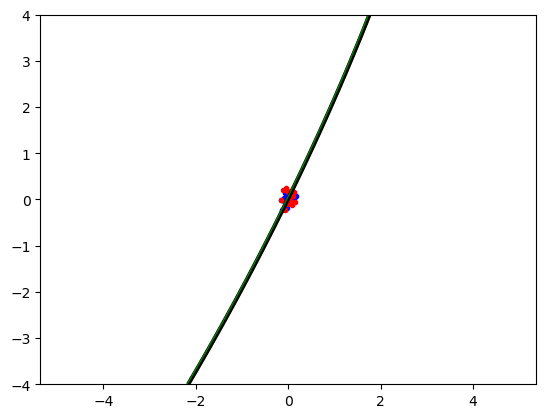

Optimization success: False
(50, 50)


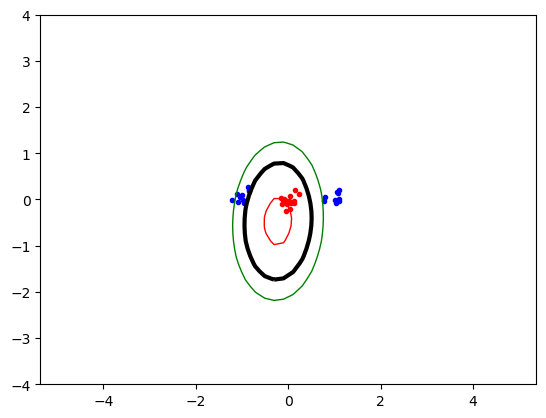

Optimization success: False
(50, 50)


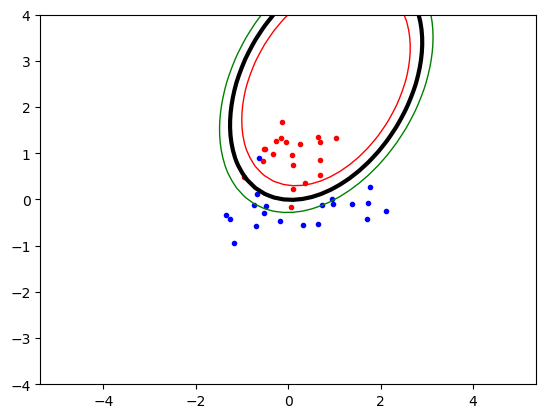

Optimization success: False


In [134]:
points = [
    [[1.5, 0.5], [-1.5, 0.5], [0, -0.5], 0.2], 
    [[0, 0], [0, 0], [0, 0], 0.1], 
    [[-1, 0], [1, 0], [0, 0], 0.1], 
    [[-1, 0], [1, 0], [0, 1], 0.5]
    ]

N = 40
C = 10e6
sigma = 10
kernel = kernel_collection.radial_basis_function(sigma)

#fig, axes = plt.subplots(2, 2)

for point in points:
    inputs, targets, classA, classB = test_data.generate(N, point[0], point[1], point[2], point[3])
    master(classA, classB, inputs, targets, N, kernel, C)

# Question 3

### Polynomial

Increasing the value of p increases the flexibility of the model. The variance increases and the bias decreases.

P value: 2
(50, 50)


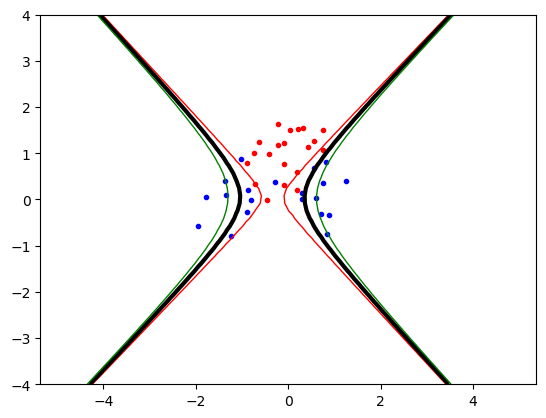

Optimization success: True
P value: 3
(50, 50)


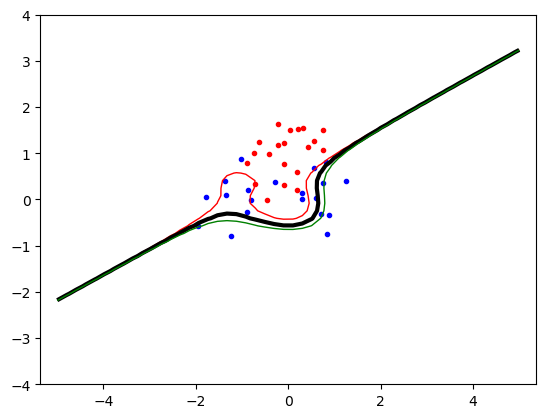

Optimization success: True
P value: 6
(50, 50)


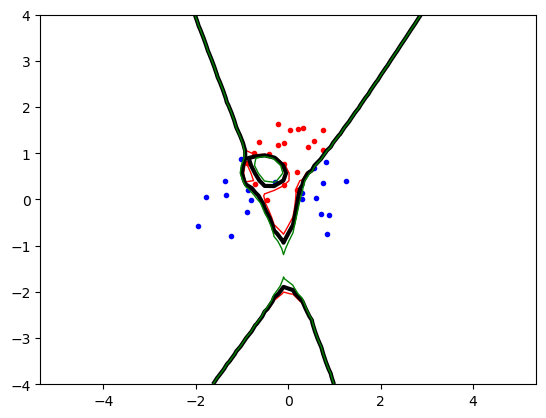

Optimization success: True
P value: 8
(50, 50)


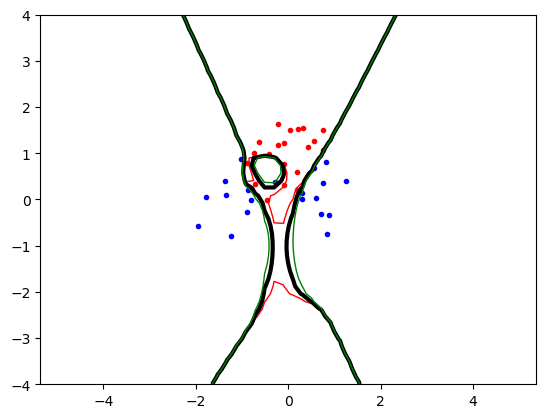

Optimization success: True


In [147]:
point = [[-1, 0], [1, 0], [0, 1], 0.5]
inputs, targets, classA, classB = test_data.generate(N, point[0], point[1], point[2], point[3])

N = 40
C = 1e6
p_values = [2, 3, 6, 8]

for p in p_values:
    print(f"P value: {p}")
    kernel = kernel_collection.polynomial(p)
    master(classA, classB, inputs, targets, N, kernel, C)

### Radial
Decreasing sigma makes the model more flexible and thus increases the variance and reduces the bias.

Sigma value: 0.1
(50, 50)


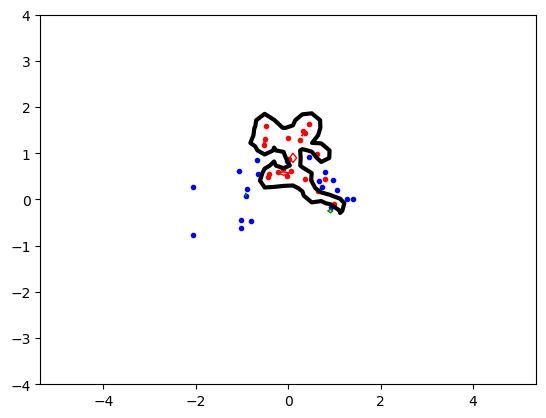

Optimization success: True
Sigma value: 1
(50, 50)


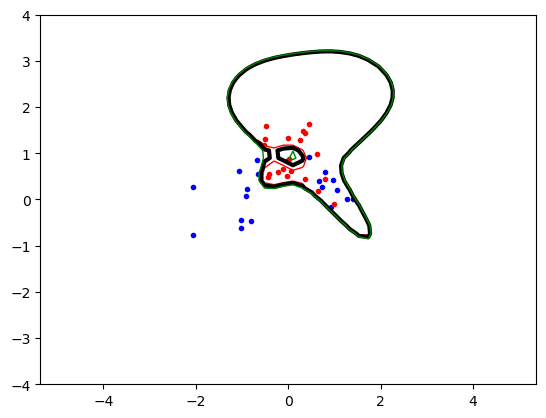

Optimization success: False
Sigma value: 10
(50, 50)


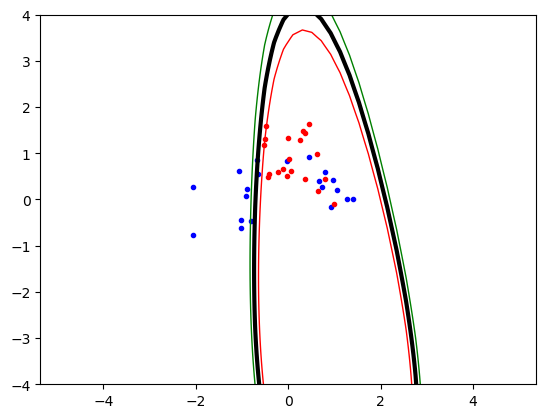

Optimization success: False
Sigma value: 100
(50, 50)


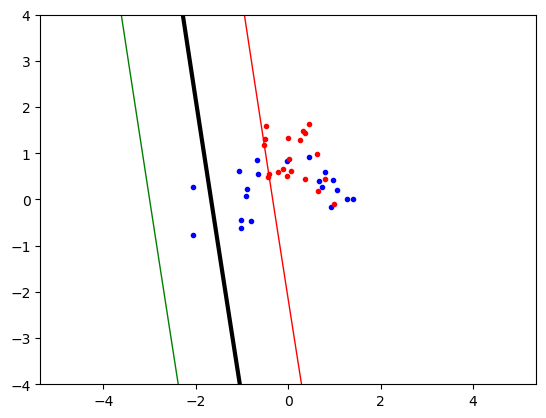

Optimization success: False


In [137]:
point = [[-1, 0], [1, 0], [0, 1], 0.5]
inputs, targets, classA, classB = test_data.generate(N, point[0], point[1], point[2], point[3])

N = 40
C = 10e6
sigma_values = [0.1, 1, 10, 100]

for sigma in sigma_values:
    print(f"Sigma value: {sigma}")
    kernel = kernel_collection.radial_basis_function(sigma)
    master(classA, classB, inputs, targets, N, kernel, C)

# Question 4

Increasing the value of C penalizes missclassified training data points. This decreases the bias and increases the variance. For an optimal choice of C the model should generalize better.

C value: 0.1
(50, 50)


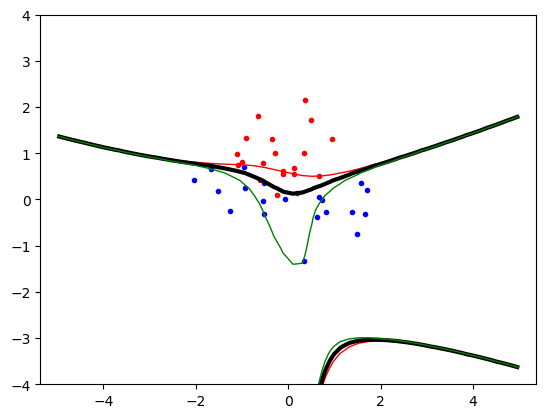

Optimization success: True
C value: 100
(50, 50)


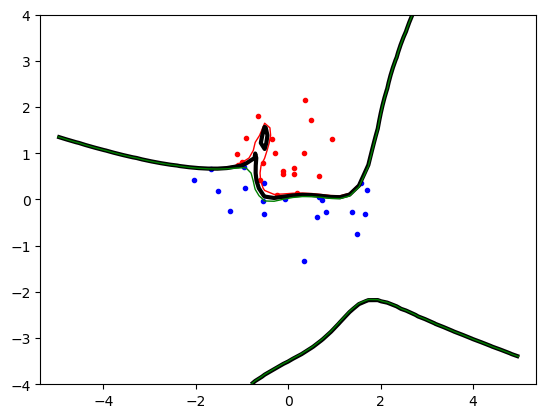

Optimization success: True
C value: 1000.0
(50, 50)


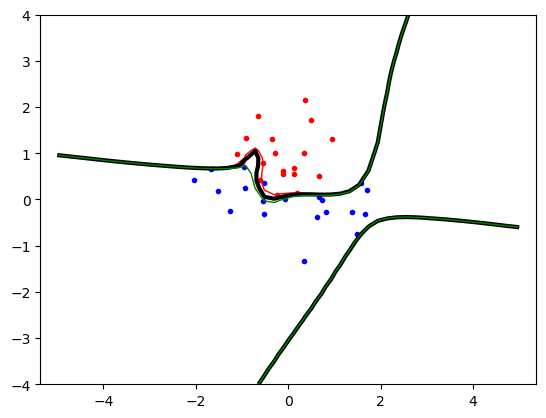

Optimization success: True
C value: 10000.0
(50, 50)


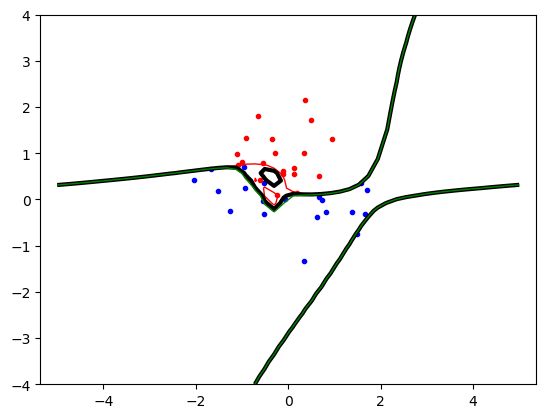

Optimization success: False


In [143]:
point = [[-1, 0], [1, 0], [0, 1], 0.5]
inputs, targets, classA, classB = test_data.generate(N, point[0], point[1], point[2], point[3])

N = 40
C_values = [0.1, 100, 1e3, 1e4]
p = 6
kernel = kernel_collection.polynomial(p)

for C in C_values:
    print(f"C value: {C}")
    master(classA, classB, inputs, targets, N, kernel, C)

# Question 5

When increasing p or decreasing sigma we are increasing the capability of the model of achieving a complex decision boundary. However, if C is very low the cost function does not value classifying each point correctly high enough. Therefore, the model is not utilizing its complexity to reduce bias and varying p and sigma won't affect the result much.

If we believe that the complexity of the underlying model is sufficient in order to get a good decision boundary we should opt for increasing C instead of increasing the model complexity further. 

If underlying is not flexible enough varying C won't result in significantly decreased bias, and we should instead opt for increasing the model complexity by increasing p or reducing sigma.